In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from forest_fire import ForestFire
from pandas import DataFrame

from projects.agent_based_modelling.lib import batch_run
from projects.agent_based_modelling.lib.plot import animate_show


def plot_mean(_df: DataFrame, key: str):
    (_df.groupby(["p", "size"]).mean().reset_index().set_index("p").groupby("size")[key].plot(legend=True))

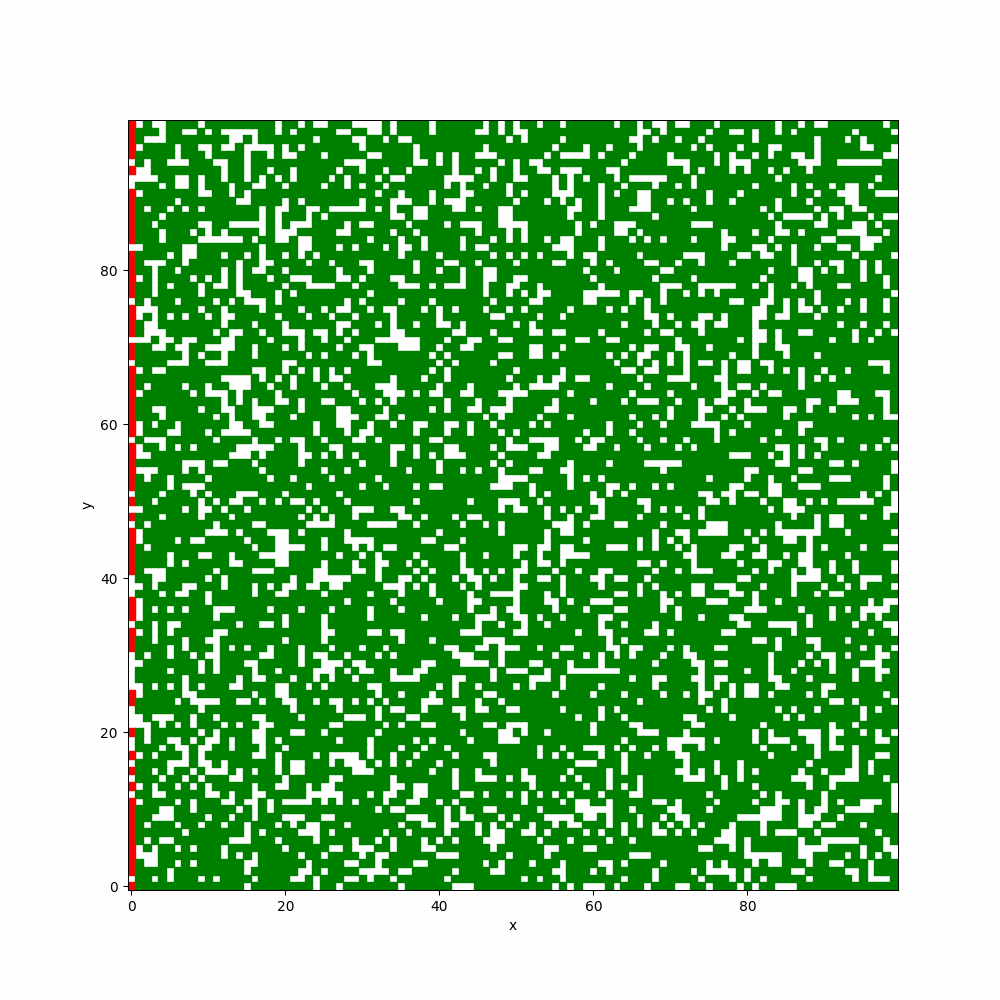

In [6]:
animate_show(
    model=ForestFire(size=100, p=0.7),
    agent_color_func=lambda tree: tree.state,
)

In [2]:
df = batch_run(
    cls=ForestFire,
    params=dict(
        size=[20, 50, 100],
        p=np.arange(start=0, stop=1, step=0.01),
    ),
    iterations=1000,
)

100%|██████████| 300000/300000 [1:23:38<00:00, 59.78it/s]  


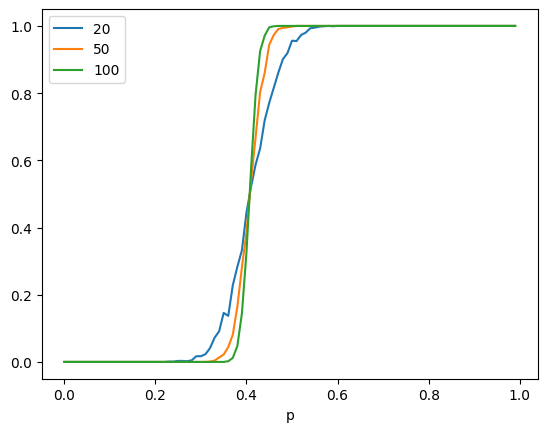

In [3]:
plot_mean(df, "opposite_edge_hit")

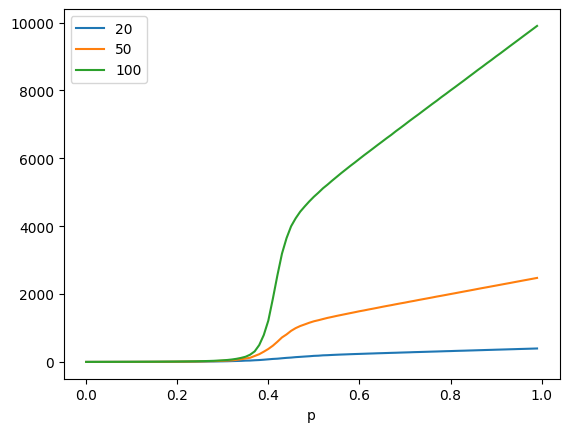

In [4]:
plot_mean(df, "biggest_burned_cluster")

In [66]:
df = batch_run(
    cls=ForestFire,
    params=dict(
        size=[20, 50, 100],
        p=np.arange(start=0, stop=1, step=0.01),
        wind_x=1,
    ),
    iterations=100,
)

100%|██████████| 30000/30000 [14:15<00:00, 35.06it/s] 


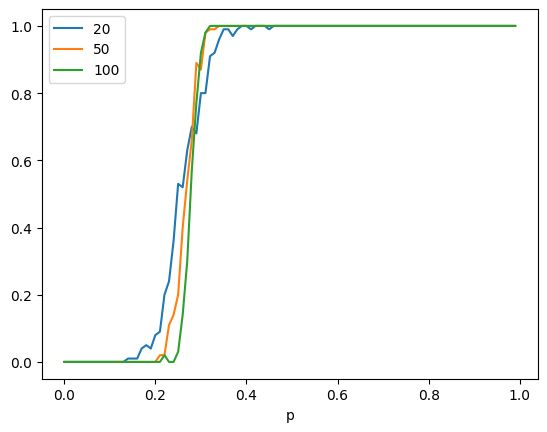

In [67]:
plot_mean(df, "opposite_edge_hit")

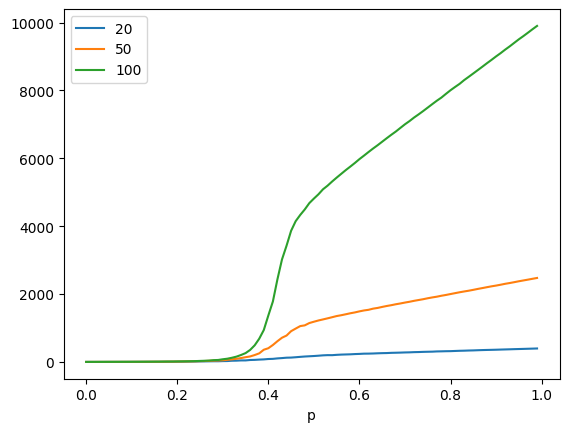

In [68]:
plot_mean(df, "biggest_burned_cluster")

In [69]:
df = batch_run(
    cls=ForestFire,
    params=dict(
        size=[20, 50, 100],
        p=np.arange(start=0, stop=1, step=0.01),
        wind_x=2,
    ),
    iterations=100,
)

100%|██████████| 30000/30000 [14:24<00:00, 34.71it/s] 


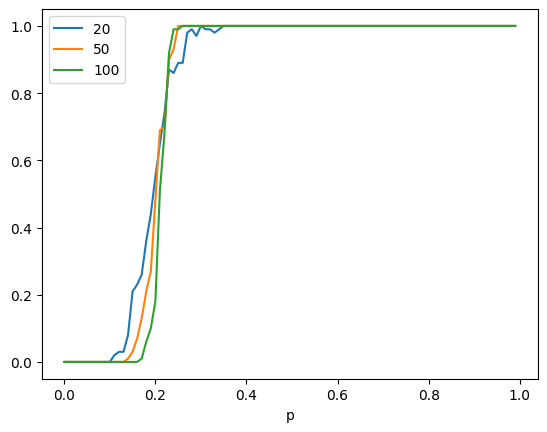

In [70]:
plot_mean(df, "opposite_edge_hit")

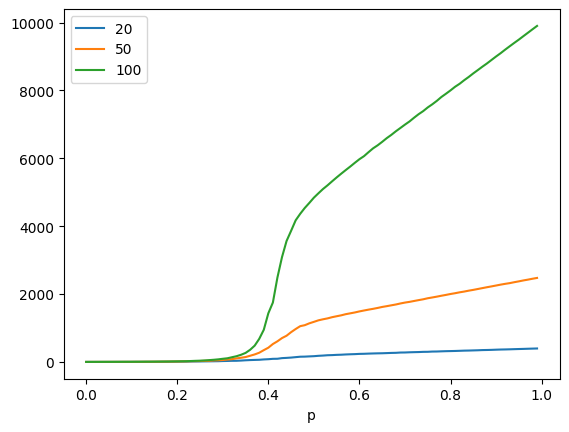

In [71]:
plot_mean(df, "biggest_burned_cluster")